Exemplo de uso do Support Vector Classifier para apoiar a aula de de Support Vector Machines.

Nesse exemplo, utilizamos SVM para classificar peixes entre obesos e não obesos




In [ ]:
import pandas as pd

fish_obesity_df = pd.read_csv("https://drive.google.com/uc?id=1cMmz4dSK0vcQCDsed_NjyW-6JsNbovYm") 
fish_obesity_df.head()

,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0


In [ ]:
labels =  fish_obesity_df['Obese']

features = fish_obesity_df[['Height','Weight']]

Na próxima célula, vamos separar os dados de treinamento e de testes, numa proporção de 80% para 20% (muito comumente usada, graças a Pareto). para isso, tentem usar a função train_test_split do ScikitLearn. Por favor, pausem esse vídeo, tentem fazer a separação dos dados sozinhos e depois voltem para ver a solução.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

Na próxima célula, vamos treinar o modelo. Para essa classificação, usaremos o modelo Support Vector Machines do ScikitLearn. Por favor, pausem o vídeo e tentem fazer o treinamento do modelo sozinhos e depois voltem para ver a solução.

In [ ]:
from sklearn.svm import SVC

classifier = SVC(random_state=42)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

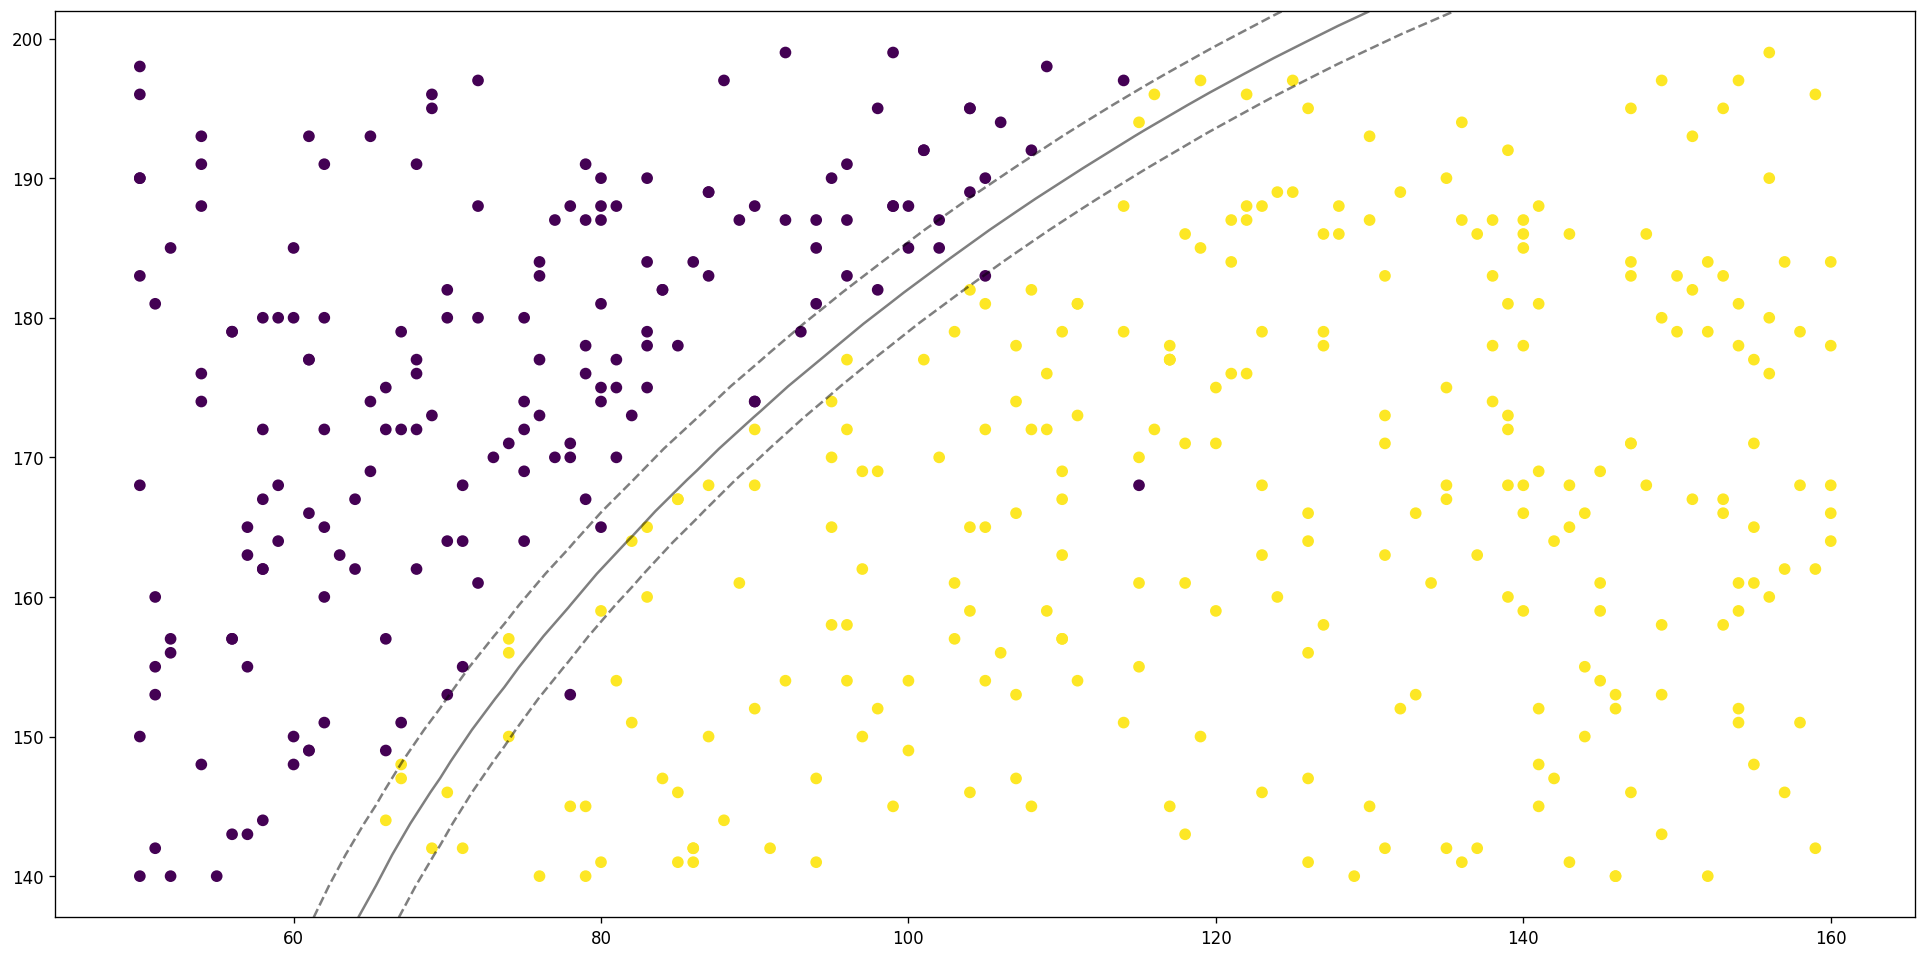

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x = X_train['Weight']
y = X_train['Height']
label = y_train

plt.figure(figsize=(20, 10), dpi=120)

plt.scatter(x, y, c=label, cmap='viridis')

# The code below was copied from: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = classifier.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
ax.contour(X, Y, P, colors='k',
            levels=[-0.05, 0, 0.05], alpha=0.5,
            linestyles=['--', '-', '--'])

In [ ]:
new_fish = [[163, 64]]
classifier.predict(new_fish)

array([0])

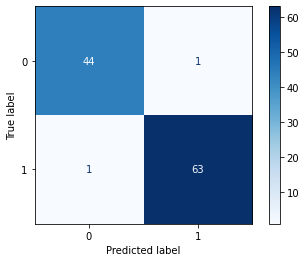

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(classification_report(y_test,y_pred))

# Acurácia, ou: em geral, qual o percentual de acerto?
accuracy = (tp + tn) / (tp + tn + fp + fn)
print ("accuracy", accuracy)

#Precision, ou: entre os que previ serem positivos, qual o percentual de acerto?
precision = tp / (tp + fp)
print ("precision", precision)

#Recall, ou: entre os que são positivos, qual o percentual de acerto?
recall = tp / (tp + fn)
print ("recall", recall)

#f1 score: media harmônica de Precision e Recall
f1_score = 2 * ((precision * recall) / (precision + recall))
print ("f1_score", f1_score)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.98      0.98      0.98        64

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109

accuracy 0.981651376146789
precision 0.984375
recall 0.984375
f1_score 0.984375
